# pandas

*Pandas is derived from the term "panel data", an econometrics term for data sets that include observations over multiple time periods for the same individuals. — Wikipedia*

It is said that the pandas package is the most important tool at the disposal of Data Scientists and Analysts working in Python today. It is a Python Library that is highly optimized for performance, with critical code paths written in Cython or C.

The pandas library a central component of the data science toolkit, used in conjunction with other libraries:

1. pandas is built on top of the **NumPy** package
2. data in pandas is often used to feed
- statistical analysis in **SciPy**
- plotting functions from **Matplotlib**
- machine learning algorithms in **Scikit-learn**
3. **Jupyter Notebooks** offer a worthy environment for using pandas to do data exploration and modelling

pandas provides tools for reading and writing data, between in-memory data structures and various formats including: 
- CSV and text files
- Microsoft Excel
- SQL databases
- and the fast HDF5 format


### DataFrames and Series

The primary two components of pandas are the Series and Data Frame.

The core feature is the fast and efficient **DataFrame** object, a two-dimensional table structure consisting of rows and columns. Essentially a collection of Series.

Each column is an object known as a **Series**, a one-dimensional labelled array capable of holding any data type (Integers, Strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the Index.

Both DataFrames and Series support several methods for data manipulation with integrated indexing.

DataFrames support:
- sub setting of large data sets
- hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure
- intelligent label-based slicing
- variability Columns can be inserted and deleted
- high performance merging and joining of data sets
- collection with a powerful group-by engine allowing split-apply-combine operations on data sets

Time series-functionality includes: 
- date range generation and frequency conversion
- moving window statistics, moving window linear regressions
- date shifting and lagging


### Module structure

For purposes of this training, we will follow this outline:

1. Install or Import pandas


2. Loading data into DataFrames
    - from a File
    - from a String (Delimited)
    - Using a List
    - Using a Date Range
    - Using other series-like options


3. Operations in DataFrames
    - Visual References (Transposing, Sorting, DataFrame Information and Statistics)
    - Selection by Indexing (by Label, by Position and Boolean Indexing)
    - Setting (Adding, Replacing, Appending, Concatenating and Merging)
    - Missing Data (Reindexing, Subsitituting and Applying)
    - String Methods
    - Summarising (Grouping, Stacking, PivotTables, Time Series and Categoricals)
    - Statistical Functions (Percent change, Covariance and Correlation)


4. Presenting Results
    - Plotting (Linear, Histogram and Box)
    - File I/O (.csv, HDF5, and Excel)
    - Gotchas


In [1116]:
# an example of how to ask for help in pandas

# help(pd.Series.loc)

## Install or Import pandas


### Install
In the terminal program (for Mac users) or command line (for PC users), use either of the following commands:

`conda install pandas`

OR

`pip install pandas`


### Import
Customarily, we import as follows:

In [1117]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt



## Loading Data into DataFrames

pandas loads data by loading data sets into a DataFrame.

Data sets may be loaded from existing storage such as from a SQL Database, .csv file, or Excel file.
pandas I/O API is a set of top level reader functions that generally return a pandas object (for example: `read_csv`). The corresponding writer functions are object methods (for example: `to_csv`).

pandas DataFrames can also be created from a single list or a list of lists, dictionary, and from a list of dictionary etc.

![pandas dtypes.png](images/pandas dtypes.png)


### From a File

With .csv files, a single line is required to load data into a DataFrame:

`df = pd.read_csv(file_path, sep=’,’, header=0, index_col=False, names=None)`

- `df` would be replaced by the unique name of the DataFrame

The pandas function: `read_csv` has a plethora of parameters.
The most commonly used parameters include:

- `file_path` would be replaced by the required specific path to a file (a str, pathlib.Path, or *py._path.local.LocalPath*), URL (including http, ftp, and S3 locations), or any object with a read() method (such as an open file or StringIO)

- `sep=’,’` indicates that the data being read is separated by commas (,). If this is not the case, specify: `sep =" "` (if separated by a blank space) or `sep='\t'` (if separated by a tab)

- `header=0` indicates that the names of the columns are in the first row in the file. If this is not the case, specify: `header=None`

- `index_col=False` indicates that the first column of the data is not the Index for the DataFrame, If the first column is an Index, specify: `index_col=True`

- `names=None` indicates that the column names are not being specified and will be inferred from the .csv file. If this is not the case, specify: `header=some_number` so that the specified column names are read and loaded correctly. Alternatively, specify the names in order as this value, separated by commas


### From a String (Delimited)

It is also possible to load data using a Delimited String.

This is done by making use of the pandas API compatibility layer: `pandas.compat` and importing the I/O class: `StringIO`

When using the `StringIO` class, ensure imports are according to the Python version in use:
- `from StringIO import StringIO` for Python 2
- `from io import StringIO` for Python 3


_**See example below:**_


In [1118]:
from io import StringIO
gen_load = pd.read_csv(StringIO(
"""
Number,Name,Area Name,Nom kV,Load MW,Gen MW
1,ONE,ESKOM,400,0,90
2,TWO,ESKOM,400,0,90
3,THREE,NAMPOWER,400,180,0
"""), index_col = "Number")


Once loaded, the DataFrame can be called by it's name.


_**See example below:**_


In [1119]:
gen_load

,Name,Area Name,Nom kV,Load MW,Gen MW
Number,,,,,
1,ONE,ESKOM,400,0,90
2,TWO,ESKOM,400,0,90
3,THREE,NAMPOWER,400,180,0


### Using a List

pandas also facilitates the creation of a Series by passing a list of values.

For this, the pandas function `Series` is called.
The result will include a default Integer Index for this Series.
This function will also return identification of the datatype (`dtype`) at the end of the DataFrame.

Some frequently used _**Series function**_ parameters include:

- `data` : array-like, dictionary, or scalar value. Contains data stored in Series, separated by a comma, and enclosed with braces `[]`

- `index` : array-like or Index (1d). Values must be hashable and have the same length as data. Non-unique index values are allowed.

- `dtype` : numpy.dtype or None. If None, dtype will be inferred


pandas treats `None` and `NaN` as interchangeable for indicating missing or null values.
By default these missing or null values not included in computations.
To list a null value, use: `np.nan`


_**See example below:**_


In [1120]:
sFirst = pd.Series([1,3,5,np.nan,6,8])
sFirst

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

### Using a Date Range

pandas also facilitates the creation of a DateTime Index by passing a NumPy array.

For this, the pandas function `date_range` is called.
The resulting Series is named `DateTimeIndex` by default.
This function will also return identification of the datatype (`dtype`) as well as the frequency of the values (`freq`).

Some frequently used **_Date Range function_** parameters:

- `start` : String or datetime-like, optional. Left bound for generating dates

- `end` : String or datetime-like, optional. Right bound for generating dates

- `periods` : Integer, optional. Number of periods to generate

- `freq` : String or DateOffset, default ‘D’ (calendar daily) String can be updated for all calendar options, and also multiples like 7D or 3M


_**See example below:**_


In [1121]:
dates = pd.date_range('20190101', periods=6)

dates

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06'],
              dtype='datetime64[ns]', freq='D')


It is now possible to create a DataFrame with a DateTime Index and labeled columns.


_**See example below:**_


In [1122]:
dfData1 = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

dfData1

,A,B,C,D
2019-01-01,-0.018862,0.506884,0.002931,-0.134582
2019-01-02,0.160282,1.263459,-0.304879,0.063906
2019-01-03,-0.489581,-0.140495,-1.804682,-0.830140
2019-01-04,0.533439,1.288184,0.830266,0.693305
2019-01-05,0.392912,-0.643530,1.619957,0.316364
2019-01-06,0.297479,-0.755912,2.391173,2.099550


### Using other series-like options

pandas also facilitates the creation of a DataFrame by passing a dictionary of objects that can be converted to series-like.

For this, the pandas function `DataFrame` is called.

Some frequently used _**DataFrame function**_ parameters include:

- `data` : numpy ndarray (structured or homogeneous), dictionary, or DataFrame. Dictionary can contain Series, arrays, constants, or list-like objects

- `index` : Index or array-like. Index to use for resulting DataFrame. Will default to RangeIndex if not provided

- `columns` : Index or array-like. Column labels to use for resulting DataFrame. Will default to RangeIndex if not provided

- `dtype` : dtype, default None. Data type to force. Only a single dtype is allowed. If None, it is inferred


_**See example below:**_


In [1123]:
dfData2 = pd.DataFrame({ 'StartValue' : 1.,
                     'StartDate' : pd.Timestamp('20190102'),
                     'EndValue' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'Activity' : np.array([3] * 4,dtype='int32'),
                     'Action' : pd.Categorical(["test","train","test","train"]),
                     'Response' : 'foo' })
dfData2

,StartValue,StartDate,EndValue,Activity,Action,Response
0,1.0,2019-01-02,1.0,3,test,foo
1,1.0,2019-01-02,1.0,3,train,foo
2,1.0,2019-01-02,1.0,3,test,foo
3,1.0,2019-01-02,1.0,3,train,foo


## Operations in DataFrames

IMPORTANT: Some of the pandas methods are **passed inplace**, others not by default. For this reason, pandas has the inplace keyword argument as a parameter in many of its methods. Using `inplace=True` will modify the DataFrame object in place, in other words update and overwrite the DataFrame object variable.

### Visual References

Especially when working with a new large data set, it is best practice to print out a few attributes of the data set to keep as a visual reference.

A good place to start is with an idea/extract of the DataFrame structure.

It is possible to request either the **top (`.head`) or bottom (`.tail`) rows.**
pandas outputs the first five rows of the DataFrame by default, however the required count may be set as a parameter.


_**See examples below:**_


In [1124]:
dfData1.head()

,A,B,C,D
2019-01-01,-0.018862,0.506884,0.002931,-0.134582
2019-01-02,0.160282,1.263459,-0.304879,0.063906
2019-01-03,-0.489581,-0.140495,-1.804682,-0.830140
2019-01-04,0.533439,1.288184,0.830266,0.693305
2019-01-05,0.392912,-0.643530,1.619957,0.316364


In [1125]:
dfData1.tail(3)

,A,B,C,D
2019-01-04,0.533439,1.288184,0.830266,0.693305
2019-01-05,0.392912,-0.643530,1.619957,0.316364
2019-01-06,0.297479,-0.755912,2.391173,2.099550


#### Transposing

By reviewing the top and/or bottom rows of the data set, it may appear that the DataFrame has not been created as expected and/or could be better structured for anticipated analysis. 

To assist, pandas facilitates **transposing** of the data set.

Transpose is the action of writing rows as columns and vice-versa.


_**See example below:**_


In [1126]:
dfData1.T

,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06
A,-0.018862,0.160282,-0.489581,0.533439,0.392912,0.297479
B,0.506884,1.263459,-0.140495,1.288184,-0.643530,-0.755912
C,0.002931,-0.304879,-1.804682,0.830266,1.619957,2.391173
D,-0.134582,0.063906,-0.830140,0.693305,0.316364,2.099550


In [1127]:
# For interest, pandas facilitates the pulling of a list of the Column labels

dfData1.columns.tolist()

['A', 'B', 'C', 'D']

In [1128]:
# For interest, to return the Column labels as an index object

dfData1.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [1129]:
# For interest, it is also possible to change the Column labels
# It is important to store the result as a new DataFrame as this renaming function does not occur in-place.

dfData1Copy = dfData1.copy()
dfData1Copy.rename(columns={'A':'newA','B':'newB'}, inplace=True)
dfData1Copy

,newA,newB,C,D
2019-01-01,-0.018862,0.506884,0.002931,-0.134582
2019-01-02,0.160282,1.263459,-0.304879,0.063906
2019-01-03,-0.489581,-0.140495,-1.804682,-0.830140
2019-01-04,0.533439,1.288184,0.830266,0.693305
2019-01-05,0.392912,-0.643530,1.619957,0.316364
2019-01-06,0.297479,-0.755912,2.391173,2.099550


#### Sorting

To further assist for presentation, pandas facilitates **sorting** of the data set.

It is possible to sort either by the Index (`.sort_index`) or by values (`.sort_values`)

Some frequently used **_Sort function_** parameters include:

- `by` : string or list of string.

- `axis` : {0 or ‘index’, 1 or ‘columns’}, default 0 Axis to be sorted.

- `ascending` : Boolean or list of Boolean, default True. Sort ascending vs. descending. Able to specify a list for multiple sort orders.

- `inplace` : Boolean, default False. If True, perform operation in-place.



_**See examples below:**_


In [1130]:
dfData1.sort_index(axis=1, ascending=False)

,D,C,B,A
2019-01-01,-0.134582,0.002931,0.506884,-0.018862
2019-01-02,0.063906,-0.304879,1.263459,0.160282
2019-01-03,-0.830140,-1.804682,-0.140495,-0.489581
2019-01-04,0.693305,0.830266,1.288184,0.533439
2019-01-05,0.316364,1.619957,-0.643530,0.392912
2019-01-06,2.099550,2.391173,-0.755912,0.297479


In [1131]:
dfData1.sort_values(by='B')

,A,B,C,D
2019-01-06,0.297479,-0.755912,2.391173,2.099550
2019-01-05,0.392912,-0.643530,1.619957,0.316364
2019-01-03,-0.489581,-0.140495,-1.804682,-0.830140
2019-01-01,-0.018862,0.506884,0.002931,-0.134582
2019-01-02,0.160282,1.263459,-0.304879,0.063906
2019-01-04,0.533439,1.288184,0.830266,0.693305


#### DataFrame Information

Also, especially when working with a new large data set, it is best practice to print out the **Information Document** to keep as a visual reference.

Running the command `.info()` provides essential details about the data set such as the number of rows and columns, the number of non-null values, what type of data is in each column, and how much memory your DataFrame is using.


_**See example below:**_


In [1132]:
dfData1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2019-01-01 to 2019-01-06
Freq: D
Data columns (total 4 columns):
A    6 non-null float64
B    6 non-null float64
C    6 non-null float64
D    6 non-null float64
dtypes: float64(4)
memory usage: 400.0 bytes



Alternatively, some details in the data set can be called individually.

These attributes include:

- `.index` will list the Index values

- `.shape` outputs a tuple of (rows, columns)

- `.dtypes` will list the datatypes in force

- `.columns` will list the Column labels and overall datatype


_**See examples below:**_


In [1133]:
dfData1.index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06'],
              dtype='datetime64[ns]', freq='D')

In [1134]:
dfData1.shape

(6, 4)

In [1135]:
dfData1.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

In [1136]:
dfData1.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

#### DataFrame Statistics

It may be useful when working with a new large data set to create a quick **Statistical Summary** of the data set to also keep as a visual reference.

Running the command `.describe()` provides for the analysis of numeric data. The resulting index will include count, mean, std, min, max as well as lower, 50 and upper percentiles. By default, the lower percentile is 25 and the upper percentile is 75. The 50 percentile is the same as the median.

For object data (e.g. strings or timestamps), the resulting index will include count, unique, top, and freq. The top is the most common value. The freq is the most common value’s frequency. Timestamps also include the first and last items.

If multiple object values have the highest count, then the count and top results will be arbitrarily chosen from among those with the highest count.


_**See example below:**_


In [1137]:
dfData1.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.145945,0.253098,0.455794,0.368067
std,0.364792,0.909241,1.492291,0.988672
min,-0.489581,-0.755912,-1.804682,-0.830140
25%,0.025924,-0.517771,-0.227926,-0.084960
50%,0.228880,0.183194,0.416599,0.190135
75%,0.369054,1.074315,1.422534,0.599070
max,0.533439,1.288184,2.391173,2.099550


Alternatively, some statistics for the data set can be called individually.

These attributes include:

- `.count()` returns the number of non-null observations
- `.sum()` returns the sum of the values
- `.mean()` returns the mean of the values
- `.median()` returns the	median of values
- `.mode()` returns the mode of values
- `.std()` returns the Standard Deviation of the values
- `.min()` returns the minimum value
- `.max()` returns the maximum value
- `.abs()` returns the Absolute value
- `.prod()` returns the product of values
- `.cumsum()` returns the	cumulative Sum
- `.cumprod()` returns the cumulative Product


**See some examples below:**


In [1138]:
sSecond = pd.Series(np.random.randint(0, 7, size=10))
sSecond

0    3
1    5
2    6
3    1
4    4
5    0
6    6
7    3
8    4
9    6
dtype: int32

In [1139]:
# As a Series of Integers has been created, it is possible to count the occurance of each value

sSecond.value_counts()

6    3
4    2
3    2
5    1
1    1
0    1
dtype: int64

In [1140]:
dfData1.count()

A    6
B    6
C    6
D    6
dtype: int64

In [1141]:
dfData1.mean()

A    0.145945
B    0.253098
C    0.455794
D    0.368067
dtype: float64

In [1142]:
#same operation on the other axis

dfData1.mean(1)

2019-01-01    0.089093
2019-01-02    0.295692
2019-01-03   -0.816225
2019-01-04    0.836299
2019-01-05    0.421426
2019-01-06    1.008072
Freq: D, dtype: float64


pandas also facilitates calling only the **values of the data set** as an array.


_**See example below:**_


In [1143]:
dfData1.values

array([[-0.01886229,  0.50688393,  0.00293113, -0.13458234],
       [ 0.16028167,  1.26345862, -0.30487903,  0.0639065 ],
       [-0.48958128, -0.14049518, -1.80468158, -0.83014041],
       [ 0.53343927,  1.28818425,  0.83026639,  0.69330477],
       [ 0.39291198, -0.64353012,  1.61995702,  0.31636386],
       [ 0.29747917, -0.7559124 ,  2.39117305,  2.09954998]])

### Selection by Indexing

As a DataFrame is a two-dimensional data structure (data is aligned as a table in rows and columns), it is possible to perform basic operations on the rows/columns like selecting, deleting, adding, and renaming.

pandas DataFrames support familiar Python expressions for selecting and setting elements using subscripts `[]` and slicing.
In pandas, Indexing facilitates selecting particular rows and columns of data from a DataFrame. Indexing can also be known as Subset Selection.

pandas offers 4 methods for selection by Indexing:

by Label
- `.at` and `.loc` both provide name-based indexing
- `.at` provides faster indexing for a single element
- `.loc` can slice more than one element

by Position
- `.iat` and `.iloc` both provide integer-based indexing
- `.iat` provides indexing for a single element
- `.iloc` can slice more than one element

pandas Syntax for `loc` and `iloc`:

The Indexing operator is used to refer to the braces `[]` following an object.

- for a Series: `s.loc[indexer]`
- for a DataFrame: `df.loc[row_indexer,column_indexer]`

#### Selection by Label

##### Column Selection by Label


_**See examples below:**_
Notice that all rows in the DataFrame are returned, with column label slicing presented.


In [1144]:
dfData2["EndValue"]

0    1.0
1    1.0
2    1.0
3    1.0
Name: EndValue, dtype: float32

In [1145]:
dfData2[['StartValue','EndValue']]

,StartValue,EndValue
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0


##### Row Selection by Label


_**See example below:**_
Notice that all columns in the DataFrame are returned, with row label slicing presented.
In this example: Those rows on with Index values 2 and 3


In [1146]:
dfData2.loc[2:3]

,StartValue,StartDate,EndValue,Activity,Action,Response
2,1.0,2019-01-02,1.0,3,test,foo
3,1.0,2019-01-02,1.0,3,train,foo


##### Multi-Axis Selection by Label


_**See example below:**_
Notice all rows requested with column label slicing.
In this example: Remember that A and B are column labels in the DataFrame dfData1, not column positions.


In [1147]:
dfData1.loc[:,['A','B']]

,A,B
2019-01-01,-0.018862,0.506884
2019-01-02,0.160282,1.263459
2019-01-03,-0.489581,-0.140495
2019-01-04,0.533439,1.288184
2019-01-05,0.392912,-0.643530
2019-01-06,0.297479,-0.755912



In this example: Now showing row and column label slicing, with both endpoints included:



In [1148]:
dfData1.loc['20190102':'20190104',['A','B']]

,A,B
2019-01-02,0.160282,1.263459
2019-01-03,-0.489581,-0.140495
2019-01-04,0.533439,1.288184



In this example: It is possible to offer a reduction in the dimensions of the returned object:



In [1149]:
dfData1.loc['20190102',['A','B']]

A    0.160282
B    1.263459
Name: 2019-01-02 00:00:00, dtype: float64

In pandas, a **scalar value** includes:
- numpy array scalar (e.g. np.int64)
- Python builtin numerics
- Python builtin byte arrays and strings
- None
- datetime.datetime
- datetime.timedelta
- Period
- decimal.Decimal
- Interval
- DateOffset
- Fraction
- Number


_**See example below:**_
In this example: A scalar value is being specifically called from the `df` DataFrame, in the first row, under the column labelled: A


In [1150]:
dfData1.loc[dates[0],'A']

-0.018862294063333215


pandas offers faster access to a scalar value (equivalent to the prior method) by making use of `.at`


_**See example below:**_


In [1151]:
dfData1.at[dates[0],'A']

-0.018862294063333215

#### Selection by Position

##### Row Selection by Position


_**See examples below:**_
Notice that all columns in the DataFrame are returned, with row slicing presented.
In this example: The rows on the lines between 0 (inclusive) and less than 3 are presented.


In [1152]:
dfData1[0:3]

,A,B,C,D
2019-01-01,-0.018862,0.506884,0.002931,-0.134582
2019-01-02,0.160282,1.263459,-0.304879,0.063906
2019-01-03,-0.489581,-0.140495,-1.804682,-0.830140


In this example: The row on the specific third line is presented.


In [1153]:
dfData1.iloc[3]

A    0.533439
B    1.288184
C    0.830266
D    0.693305
Name: 2019-01-04 00:00:00, dtype: float64

##### Multi-Axis Selection by Position


_**See examples below:**_
By Integer slices, acting similar to numpy/python.

In [1154]:
dfData1.iloc[3:5,0:2]

,A,B
2019-01-04,0.533439,1.288184
2019-01-05,0.392912,-0.643530


In this example: By lists of Integer position locations, similar to the numpy/python style:

In [1155]:
dfData1.iloc[[1,2,4],[0,2]]

,A,C
2019-01-02,0.160282,-0.304879
2019-01-03,-0.489581,-1.804682
2019-01-05,0.392912,1.619957


In this example: For slicing rows explicitly


In [1156]:
dfData1.iloc[1:3,:]

,A,B,C,D
2019-01-02,0.160282,1.263459,-0.304879,0.063906
2019-01-03,-0.489581,-0.140495,-1.804682,-0.830140


In this example: For slicing columns explicitly


In [1239]:
dfData1.iloc[:,1:3]

,B,C
2019-01-01,0.506884,0.002931
2019-01-02,1.263459,-0.304879
2019-01-03,-0.140495,-1.804682
2019-01-04,1.288184,0.830266
2019-01-05,-0.643530,1.619957
2019-01-06,-0.755912,2.391173




_**See example below:**_
A scalar value is being specifically called from the `df` DataFrame, in the second row, under the second column

In [1158]:
dfData1.iloc[1,1]

1.2634586203510898


pandas offers faster access to a scalar value (equivalent to the prior method) by making use of `.iat`


_**See example below:**_


In [1159]:
dfData1.iat[1,1]

1.2634586203510898

#### Selection by Boolean Indexing

With Boolean Indexing, it is possible to select subsets of data based on the actual values of the data in the DataFrame and not on their row/column Labels or Position.

A Boolean vector is used to filter the data.
- `==` not equal to
- `>` greater than
- `<` less than
- `<=` less than and equal to
- `>=` more than and equal to


_**See examples below:**_
In this example: A single column has been identified in the DataFrame, with a request for the result to only present the values greater than zero.

In [1160]:
dfData1[dfData1.A > 0]

,A,B,C,D
2019-01-02,0.160282,1.263459,-0.304879,0.063906
2019-01-04,0.533439,1.288184,0.830266,0.693305
2019-01-05,0.392912,-0.643530,1.619957,0.316364
2019-01-06,0.297479,-0.755912,2.391173,2.099550


In this example: All values from the DataFrame have been requested where the Boolean condition has been met

In [1161]:
dfData1[dfData1 <= 0]

,A,B,C,D
2019-01-01,-0.018862,NaN,NaN,-0.134582
2019-01-02,NaN,NaN,-0.304879,NaN
2019-01-03,-0.489581,-0.140495,-1.804682,-0.830140
2019-01-04,NaN,NaN,NaN,NaN
2019-01-05,NaN,-0.643530,NaN,NaN
2019-01-06,NaN,-0.755912,NaN,NaN


In this example: Again, a single column has been identified in the DataFrame, but with a request for the result to only present matching the given String values by using `.isin()`

In [1162]:
dfData2[dfData2['Action'].isin(['train'])]

,StartValue,StartDate,EndValue,Activity,Action,Response
1,1.0,2019-01-02,1.0,3,train,foo
3,1.0,2019-01-02,1.0,3,train,foo


### Setting

pandas provides various facilities for the combining of Series, DataFrame, and Panel objects - as well as the replacing of data values - with varying set logic for the indexes and relational algebra functionality in the case of join/merge-type operations.

#### Adding

It is important to always ensure that when setting a new column that the list matches the number of items already present in the Indexes as setting a new column will automatically be aligned by the Indexes.


**See examples below:**


In [1163]:
# An extra Series, with the Label E is being added to a copy of DataFrame dfData1

dfData3 = dfData1.copy()
dfData3['E'] = ['one', 'one','two','three','three','four']
dfData3

,A,B,C,D,E
2019-01-01,-0.018862,0.506884,0.002931,-0.134582,one
2019-01-02,0.160282,1.263459,-0.304879,0.063906,one
2019-01-03,-0.489581,-0.140495,-1.804682,-0.830140,two
2019-01-04,0.533439,1.288184,0.830266,0.693305,three
2019-01-05,0.392912,-0.643530,1.619957,0.316364,three
2019-01-06,0.297479,-0.755912,2.391173,2.099550,four


In [1164]:
# An extra Series of Integer starting at 1 and ending at 6 (inclusive) is being created

sThird = pd.Series([1,2,3,4,5,6], index=pd.date_range('20190102', periods=6))
sThird

2019-01-02    1
2019-01-03    2
2019-01-04    3
2019-01-05    4
2019-01-06    5
2019-01-07    6
Freq: D, dtype: int64

In [1165]:
# This extra Series of Integer, with the Label F is being set in the DataFrame df

dfData3['F'] = sThird
dfData3

,A,B,C,D,E,F
2019-01-01,-0.018862,0.506884,0.002931,-0.134582,one,NaN
2019-01-02,0.160282,1.263459,-0.304879,0.063906,one,1.0
2019-01-03,-0.489581,-0.140495,-1.804682,-0.830140,two,2.0
2019-01-04,0.533439,1.288184,0.830266,0.693305,three,3.0
2019-01-05,0.392912,-0.643530,1.619957,0.316364,three,4.0
2019-01-06,0.297479,-0.755912,2.391173,2.099550,four,5.0


#### Replacing

Replacing of values may be done by referencing values by Label and/or by Position.


**See examples below:**


In [1166]:
# Looking at the DataFrame dfData3 and identifying the first row by the DateRange Index,
# the value in the column with the Label A
# is being replaced by 0

dfData3.at[dates[0],'A'] = 0

In [1167]:
# Looking at the DataFrame dfData3 and identifying the first row
# and the second column, both by position,
# the value is being replaced by 0

dfData3.iat[0,1] = 0

In [1168]:
# Looking at the DataFrame dfData3 and identifying the column with the Label D
# the values in all rows are being replaced by the results of assigning a NumPy array

dfData3.loc[:,'D'] = np.array([5] * len(dfData3))

In [1169]:
# The df is now called by name to display the results of the prior setting operations

dfData3

,A,B,C,D,E,F
2019-01-01,0.000000,0.000000,0.002931,5,one,NaN
2019-01-02,0.160282,1.263459,-0.304879,5,one,1.0
2019-01-03,-0.489581,-0.140495,-1.804682,5,two,2.0
2019-01-04,0.533439,1.288184,0.830266,5,three,3.0
2019-01-05,0.392912,-0.643530,1.619957,5,three,4.0
2019-01-06,0.297479,-0.755912,2.391173,5,four,5.0


In [1170]:
# In this example: A Dataframe dfData7 is created with 5 columns, and the data loaded

dfData7 = pd.DataFrame({'Unit': [1, 2, 3, 4 , 5 , 6],
                    'Qty': [100, 200, 300, 400, 500, 600],
                    'Test1' : [1,2,1,2,1,2],
                    'Test2' : [4,6,4,6,4,6],
                    'Test3' : [3,5,3,5,3,5]
                   })

dfData7

,Unit,Qty,Test1,Test2,Test3
0,1,100,1,4,3
1,2,200,2,6,5
2,3,300,1,4,3
3,4,400,2,6,5
4,5,500,1,4,3
5,6,600,2,6,5


In [1171]:
# In this example: The DataFrame dfData7 is copied
# and all values in the new DataFrame dfData8 that were greater than zero are set as negative numbers

dfData8=dfData7.copy()
dfData8[dfData8 > 0] = -dfData8
dfData8

,Unit,Qty,Test1,Test2,Test3
0,-1,-100,-1,-4,-3
1,-2,-200,-2,-6,-5
2,-3,-300,-1,-4,-3
3,-4,-400,-2,-6,-5
4,-5,-500,-1,-4,-3
5,-6,-600,-2,-6,-5


In [1172]:
# For interest, it is possible to remove duplicates rather than replace their values

# First, a new DataFrame of duplicate data values needs to created
dfData8a=dfData8.copy()
dfData8b=dfData8.copy()
dfFrames2 = [dfData8, dfData8a, dfData8b]
dfData8Copy = pd.concat(dfFrames2, sort=True)
#dfData8Copy.shape
dfData8Copy

,Qty,Test1,Test2,Test3,Unit
0,-100,-1,-4,-3,-1
1,-200,-2,-6,-5,-2
2,-300,-1,-4,-3,-3
3,-400,-2,-6,-5,-4
4,-500,-1,-4,-3,-5
5,-600,-2,-6,-5,-6
0,-100,-1,-4,-3,-1
1,-200,-2,-6,-5,-2
2,-300,-1,-4,-3,-3
3,-400,-2,-6,-5,-4


In [1173]:
# Next, the duplicates will be removed

dfData8Copy = dfData8Copy.drop_duplicates()
#dfData8Copy.shape
dfData8Copy

,Qty,Test1,Test2,Test3,Unit
0,-100,-1,-4,-3,-1
1,-200,-2,-6,-5,-2
2,-300,-1,-4,-3,-3
3,-400,-2,-6,-5,-4
4,-500,-1,-4,-3,-5
5,-600,-2,-6,-5,-6


#### Appending, Concatenating and Merging

These pandas functions allow for the adding of new data sets and/or new Series to an existing DataFrame, or create a completely new Dataframe as a result of combining.

- pandas `.append()` function adds the rows of a single DataFrame to another DataFrame

- pandas `.concat()` function is able to a group of 2 or more DataFrames and then combines all the DataFrames via the rows or columns

- pandas `.merge()` function allows for more SQL-like merging of two DataFrames, specifically merging on similar values in a column found in the two DataFrames

Columns not in the original DataFrames are added as new columns and the new cells are populated with NaN value.


**See example below:**


In [1174]:
# Creating a new Series to append to DataFrame dfData3

#sSeventh = pd.Series(['0.231567', '1.235689', '-0.123456', '2.789546'], index=['A', 'B', 'C', 'D'])
#dfData3 = dfData3.append(sSeventh, ignore_index=True)
#dfData3

In [1175]:
# Creating two new DataFrames containg new rows of data

dfData4 =pd.DataFrame(np.random.randn(2,4), index=pd.date_range('20190107', periods=2), columns=list('ABCD'))
dfData4

,A,B,C,D
2019-01-07,-1.445731,-0.257639,0.885873,0.685649
2019-01-08,0.114870,-0.320182,-0.188518,-1.880422


In [1176]:
dfData5 =pd.DataFrame(np.random.randn(2,4), index=pd.date_range('20190110', periods=2), columns=list('ABCD'))
dfData5

,A,B,C,D
2019-01-10,-0.169033,1.620146,-0.057261,-1.948084
2019-01-11,0.468706,0.418494,1.283729,0.396328


In [1177]:
# Adding one new DataFrame dfData4 to existing DataFrame dfData3

dfData3.append(dfData4, ignore_index=False, sort=True)
dfData3

,A,B,C,D,E,F
2019-01-01,0.000000,0.000000,0.002931,5,one,NaN
2019-01-02,0.160282,1.263459,-0.304879,5,one,1.0
2019-01-03,-0.489581,-0.140495,-1.804682,5,two,2.0
2019-01-04,0.533439,1.288184,0.830266,5,three,3.0
2019-01-05,0.392912,-0.643530,1.619957,5,three,4.0
2019-01-06,0.297479,-0.755912,2.391173,5,four,5.0


In [1178]:
# Adding a group of DataFrames to create a new DataFrame dfData6

dfFrames1 = [dfData3, dfData4, dfData5]

dfData6 = pd.concat(dfFrames1, sort=True)
dfData6

,A,B,C,D,E,F
2019-01-01,0.000000,0.000000,0.002931,5.000000,one,NaN
2019-01-02,0.160282,1.263459,-0.304879,5.000000,one,1.0
2019-01-03,-0.489581,-0.140495,-1.804682,5.000000,two,2.0
2019-01-04,0.533439,1.288184,0.830266,5.000000,three,3.0
2019-01-05,0.392912,-0.643530,1.619957,5.000000,three,4.0
2019-01-06,0.297479,-0.755912,2.391173,5.000000,four,5.0
2019-01-07,-1.445731,-0.257639,0.885873,0.685649,NaN,NaN
2019-01-08,0.114870,-0.320182,-0.188518,-1.880422,NaN,NaN
2019-01-10,-0.169033,1.620146,-0.057261,-1.948084,NaN,NaN
2019-01-11,0.468706,0.418494,1.283729,0.396328,NaN,NaN


In [1179]:
# Adding a pieces of DataFrames to create a new DataFrame dfData7

Pieces1 = [dfData3[:7], dfData4[1:], dfData5[1:]]
dfData7 = pd.concat(Pieces1, sort=True)
dfData7

,A,B,C,D,E,F
2019-01-01,0.000000,0.000000,0.002931,5.000000,one,NaN
2019-01-02,0.160282,1.263459,-0.304879,5.000000,one,1.0
2019-01-03,-0.489581,-0.140495,-1.804682,5.000000,two,2.0
2019-01-04,0.533439,1.288184,0.830266,5.000000,three,3.0
2019-01-05,0.392912,-0.643530,1.619957,5.000000,three,4.0
2019-01-06,0.297479,-0.755912,2.391173,5.000000,four,5.0
2019-01-08,0.114870,-0.320182,-0.188518,-1.880422,NaN,NaN
2019-01-11,0.468706,0.418494,1.283729,0.396328,NaN,NaN


In [1180]:
# Creating two new DataFrames containg new rows of data

dfLeft = pd.DataFrame({'KEY': ['foo', 'foo'], 'LeftValue': [1, 2]})
dfLeft

,KEY,LeftValue
0,foo,1
1,foo,2


In [1181]:
dfRight = pd.DataFrame({'KEY': ['foo', 'foo'], 'RightValue': [4, 5]})
dfRight

,KEY,RightValue
0,foo,4
1,foo,5


In [1182]:
# Creating one new DataFrame by merging the two Dataframes on the Column labelled KEY

pd.merge(dfLeft, dfRight, on='KEY')

,KEY,LeftValue,RightValue
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [1183]:
# Another example:

dfLeft2 = pd.DataFrame({'KEY': ['foo', 'bar'], 'LeftValue': [1, 2]})
dfLeft2

,KEY,LeftValue
0,foo,1
1,bar,2


In [1184]:
dfRight2 = pd.DataFrame({'KEY': ['foo', 'bar'], 'RightValue': [4, 5]})
dfRight2

,KEY,RightValue
0,foo,4
1,bar,5


In [1185]:
pd.merge(dfLeft2, dfRight2, on='KEY')

,KEY,LeftValue,RightValue
0,foo,1,4
1,bar,2,5


### Missing Data

pandas primarily uses the value `np.nan` to represent missing data.
These values are by default not included in computations.

pandas facilitates checking for missing values function `.isnull()` and `.notnull()`
Both functions assist checking whether a value is NaN or not.
These functions can be used across both pandas DataFrames and Series.


#### Reindexing

Reindexing allows for the changing, adding and deleting of the Index on a specified axis.
Such as placing `NA` or `NaN` (Not a Number) in locations having no value in the previous index.

By default, a new DataFrame object is produced unless the new index is equivalent to the current one and the parameter `copy=False` is set. It is best practice to return a copy of the original DataFrame data.

Some frequently used _**Reindex function**_ parameters include:

- `labels` : array-like, optional. New labels/index to conform the axis specified by `axis`

- `index` and `columns` : array-like, optional. New labels/index to conform to, should be specified using keywords. Preferably an Index object to avoid duplicating data

- `axis` : Integer or String, optional. Axis to target. Can be either the axis Label (‘index’, ‘columns’) or Position (0, 1).

- `method` : {None, ‘backfill’/’bfill’, ‘pad’/’ffill’, ‘nearest’}. Method to use for filling holes in reindexed DataFrame. Please note that this is only applicable to DataFrames/Series with a monotonically increasing/decreasing index.
        None (default): don’t fill gaps
        pad / ffill: propagate last valid observation forward to next valid
        backfill / bfill: use next valid observation to fill gap
        nearest: use nearest valid observations to fill gap

- `copy` : Boolean, default is True. Returns a new object, even if the passed indexes are the same.

- `level` : Position Integer or Label. Broadcast across a level, matching Index values on the passed MultiIndex level.

- `fill_value` : scalar, default is np.NaN. Value to use for missing values. Defaults to NaN, but can be any compatible value.

- `limit` : int, default is None. Maximum number of consecutive elements to forward or backward fill.


_**See example below:**_


In [1186]:
dfData9 = dfData1.reindex(index=dates[0:4], columns=list(dfData1.columns) + ['E'])
dfData9

,A,B,C,D,E
2019-01-01,-0.018862,0.506884,0.002931,-0.134582,NaN
2019-01-02,0.160282,1.263459,-0.304879,0.063906,NaN
2019-01-03,-0.489581,-0.140495,-1.804682,-0.830140,NaN
2019-01-04,0.533439,1.288184,0.830266,0.693305,NaN


In [1187]:
# OPTION: To drop any rows that have missing data

dfData9.dropna(how='any')

,A,B,C,D,E


In [1188]:
# OPTION: Filling the missing data with a value

dfData9.fillna(value=5)

,A,B,C,D,E
2019-01-01,-0.018862,0.506884,0.002931,-0.134582,5.0
2019-01-02,0.160282,1.263459,-0.304879,0.063906,5.0
2019-01-03,-0.489581,-0.140495,-1.804682,-0.830140,5.0
2019-01-04,0.533439,1.288184,0.830266,0.693305,5.0


In [1189]:
# OPTION: To get the Boolean mask where values are NaN (True)

pd.isna(dfData9)

,A,B,C,D,E
2019-01-01,False,False,False,False,True
2019-01-02,False,False,False,False,True
2019-01-03,False,False,False,False,True
2019-01-04,False,False,False,False,True


#### Substituting

pandas also supports the option to substitute a fill value for missing data in one of the inputs bu using `.sub()`
The reverse version is `.rsub()`

Some frequently used _**Substitute function**_ parameters include:
- `other` : scalar, sequence, Series, or DataFrame. Any single or multiple element data structure, or list-like object.

- `axis` : {0 or ‘index’, 1 or ‘columns’}. Whether to compare by the index (0 or ‘index’) or columns (1 or ‘columns’). For Series input, axis to match Series index on.

- `level` : Position or Label. Broadcast across a level, matching Index values on the passed MultiIndex level.

- `fill_value` : float or None, default is None. Fill existing missing (NaN) values, and any new element needed for successful DataFrame alignment, with this value before computation. If data in both corresponding DataFrame locations is missing the result will be missing.


_**See example below:**_


In [1190]:
# In this example: The DataFrame dfData1 is copied

dfData10=dfData1.copy()
dfData10

,A,B,C,D
2019-01-01,-0.018862,0.506884,0.002931,-0.134582
2019-01-02,0.160282,1.263459,-0.304879,0.063906
2019-01-03,-0.489581,-0.140495,-1.804682,-0.830140
2019-01-04,0.533439,1.288184,0.830266,0.693305
2019-01-05,0.392912,-0.643530,1.619957,0.316364
2019-01-06,0.297479,-0.755912,2.391173,2.099550


In [1191]:
sFourth = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
sFourth

2019-01-01    NaN
2019-01-02    NaN
2019-01-03    1.0
2019-01-04    3.0
2019-01-05    5.0
2019-01-06    NaN
Freq: D, dtype: float64

In [1192]:
dfData10.sub(sFourth, axis='index')

,A,B,C,D
2019-01-01,NaN,NaN,NaN,NaN
2019-01-02,NaN,NaN,NaN,NaN
2019-01-03,-1.489581,-1.140495,-2.804682,-1.830140
2019-01-04,-2.466561,-1.711816,-2.169734,-2.306695
2019-01-05,-4.607088,-5.643530,-3.380043,-4.683636
2019-01-06,NaN,NaN,NaN,NaN


#### Applying

pandas supports the Python style of programming referred to as Functional Programming - where it is possible to pass functions to other functions. for pandas, the Apply function is used.

This may be helpful when replacing missing data values, as it is possible to apply calculated values over a DataFrame and/or a Series.

Some frequently used _**Apply function**_ parameters include:

- `axis` : {0 or ‘index’, 1 or ‘columns’}, default is 0. The index or the name of the axis. 0 is equivalent to None or ‘index’.

- `skipna` : Boolean, default is True. Exclude NA/null values. If an entire row/column is NA, the result will be NA.


_**See example below:**_


In [1193]:
# For example: by applying the `cumsum` function will result in a DataFrame or Series of the same size
# containing the cumulative sum.

dfData1.apply(np.cumsum)

,A,B,C,D
2019-01-01,-0.018862,0.506884,0.002931,-0.134582
2019-01-02,0.141419,1.770343,-0.301948,-0.070676
2019-01-03,-0.348162,1.629847,-2.106629,-0.900816
2019-01-04,0.185277,2.918032,-1.276363,-0.207511
2019-01-05,0.578189,2.274501,0.343594,0.108852
2019-01-06,0.875669,1.518589,2.734767,2.208402


In [1194]:
# For example: making use of the anonymous 'lambda' function

dfData1.apply(lambda x: x.max() - x.min())

A    1.023021
B    2.044097
C    4.195855
D    2.929690
dtype: float64

### String Methods

A strength of Python lies in its handling and manipulating of string data with relative ease.
From this base, pandas provides a comprehensive set of string operations that are essential tools in cleaning up data sets.

Here is a list of pandas String methods that mirror Python string methods:
- len()
- lower()
- translate()
- islower()
- ljust()
- upper()
- startswith()
- isupper()
- rjust()
- find()
- endswith()
- isnumeric()
- center()
- rfind()
- isalnum()
- isdecimal()
- zfill()
- index()
- isalpha()
- split()
- strip()
- rindex()
- isdigit()
- rsplit()
- rstrip()
- capitalize()
- isspace()
- partition()
- lstrip()
- swapcase()
- istitle()
- rpartition()


_**See examples below:**_


In [1195]:
sFifth = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
sFifth.str.lower()


0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [1196]:
sFifth.str.swapcase()

0       a
1       b
2       c
3    aABA
4    bACA
5     NaN
6    caba
7     DOG
8     CAT
dtype: object

In [1197]:
sFifth.str.isalpha()

0    True
1    True
2    True
3    True
4    True
5     NaN
6    True
7    True
8    True
dtype: object

### Summarising

#### Grouping

pandas `.groupby()` function can be used to group large amounts of data and compute operations on the resulting groups.

Grouping is a process involving one or more of the following steps:

 - Splitting the data into groups based on some criteria
 - Applying a function to each group independently
 - Combining the results into a data structure

The most commonly used parameters include:
- `by` : mapping, function, label, or list of labels. Used to determine the values to be grouped.

- `axis` : {0 or ‘index’, 1 or ‘columns’}, default is 0. Split along rows (0) or columns (1).

- `level` : int, level name, or sequence of such, default is None. If the axis is a MultiIndex (hierarchical), group by a particular level or levels.

- `as_index` : Boolean, default is True. For aggregated output, return object with group labels as the index. Only relevant for DataFrame input. as_index=False is effectively “SQL-style” grouped output.

- `sort` : Boolean, default is True. Sort on the group keys. Get better performance by turning this off. Note that the order of rows within each group are preserved.


_**See examples below:**_


In [1198]:
# A new DataFrame dfData11 is created

dfData11 = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                           'foo', 'bar', 'foo', 'foo'],
                    'B' : ['apple', 'applee', 'orange', 'peach',
                           'orange', 'orange', 'apple', 'peach'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
dfData11

,A,B,C,D
0,foo,apple,0.043489,0.006616
1,bar,applee,-1.425470,1.232675
2,foo,orange,0.861520,0.304272
3,bar,peach,-0.737812,0.631372
4,foo,orange,0.423173,-0.557088
5,bar,orange,-0.430672,-1.164211
6,foo,apple,-0.166586,-1.445216
7,foo,peach,-1.640416,-0.027542


In [1199]:
# Grouping by values in Column labelled A, and then applying the sum() function to the resulting groups

dfData11.groupby('A').sum()

,C,D
A,,
bar,-2.593953,0.699836
foo,-0.478820,-1.718958


In [1200]:
# Grouping by multiple columns forms a hierarchical index, and again applying the sum function is possible

dfData11.groupby(['A','B']).sum()

C         D
A   B                         
bar applee -1.425470  1.232675
    orange -0.430672 -1.164211
    peach  -0.737812  0.631372
foo apple  -0.123097 -1.438600
    orange  1.284693 -0.252816
    peach  -1.640416 -0.027542

#### Stacking

pandas `.stack()` function facilitates reshaping of the prescribed level(s) from columns to Index.

The result is a reshaped DataFrame or Series having a multi-level index with one or more new inner-most levels when compared to the original DataFrame. The new inner-most levels are created by pivoting the columns of the current dataframe as follows:
- if the columns have a single level, the output is a Series;
- if the columns have multiple levels, the new index level(s) is taken from the prescribed level(s) and the output is a DataFrame. The new index levels are sorted by default.

The most commonly used parameters include:
- `level` : Integer, String, list, default is -1. Level(s) to stack from the column axis onto the index axis, defined as one index or label, or a list of indices or labels.

- `dropna` : Boolean, default is True. Instruction on whether to drop rows in the resulting Frame/Series with missing values. Stacking a column level onto the Index axis can create combinations of Index and column values that are missing from the original dataframe.


_**See examples below:**_


In [1201]:
dfData12 = list(zip(*[['bar', 'bar', 'baz', 'baz',
                      'foo', 'foo', 'qux', 'qux'],
                     ['one', 'two', 'one', 'two',
                      'one', 'two', 'one', 'two']]))
index = pd.MultiIndex.from_tuples(dfData12, names=['first', 'second'])
dfData12 = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
dfData12

A         B
first second                    
bar   one    -1.973913  1.685342
      two    -0.460330  0.461109
baz   one     0.269286  1.712339
      two     0.630084  0.982741
foo   one    -1.057745  1.334691
      two     0.773309 -1.231491
qux   one     0.092514  0.953323
      two     1.562239 -0.438080

In [1202]:
# Applying the stack() function will result in a level in the DataFrame’s columns being compressed

dfData13 = dfData12.stack()
dfData13

first  second   
bar    one     A   -1.973913
               B    1.685342
       two     A   -0.460330
               B    0.461109
baz    one     A    0.269286
               B    1.712339
       two     A    0.630084
               B    0.982741
foo    one     A   -1.057745
               B    1.334691
       two     A    0.773309
               B   -1.231491
qux    one     A    0.092514
               B    0.953323
       two     A    1.562239
               B   -0.438080
dtype: float64

In [1203]:
# With a stacked DataFrame or Series (having a MultiIndex as the index),
# the inverse operation of stack() is unstack()
# which by default will unstack the last level
    
dfData13.unstack()

A         B
first second                    
bar   one    -1.973913  1.685342
      two    -0.460330  0.461109
baz   one     0.269286  1.712339
      two     0.630084  0.982741
foo   one    -1.057745  1.334691
      two     0.773309 -1.231491
qux   one     0.092514  0.953323
      two     1.562239 -0.438080

In [1204]:
dfData13.unstack(1)

second        one       two
first                      
bar   A -1.973913 -0.460330
      B  1.685342  0.461109
baz   A  0.269286  0.630084
      B  1.712339  0.982741
foo   A -1.057745  0.773309
      B  1.334691 -1.231491
qux   A  0.092514  1.562239
      B  0.953323 -0.438080

In [1205]:
dfData13.unstack(0)

first          bar       baz       foo       qux
second                                          
one    A -1.973913  0.269286 -1.057745  0.092514
       B  1.685342  1.712339  1.334691  0.953323
two    A -0.460330  0.630084  0.773309  1.562239
       B  0.461109  0.982741 -1.231491 -0.438080

#### Pivot Tables

Create a spreadsheet-style pivot table as a DataFrame. The levels in the pivot table will be stored in MultiIndex objects (hierarchical indexes) on the index and columns of the result DataFrame.

The most commonly used parameters include:
- `data` : DataFrame

- `values` : column to aggregate, optional

- `index : column, Grouper, array, or list of the previous. If an array is passed, it must be the same length as the data. The list can contain any of the other types (except list). Keys to group by on the pivot table index. If an array is passed, it is being used as the same manner as column values.

- `columns` : column, Grouper, array, or list of the previous. Same instructions as parameter `index`

- `aggfunc` : function, list of functions, dictionary, default is numpy.mean. If list of functions passed, the resulting pivot table will have hierarchical columns whose top level are the function names (inferred from the function objects themselves) If a dictionary is passed, the key is column to aggregate and value is function or list of functions

- `fill_value` : scalar, default is None. Value to be used to replace missing values

- `margins` : Boolean, default is False. Instruction to add all row / columns (e.g. for subtotal / grand totals)

- `dropna` : Boolean, default is True. Instruction to not include columns whose entries are all NaN

- `margins_name` : String, default is ‘All’. Name of the row / column that will contain the totals when margins is True.


_**See example below:**_


In [1206]:
dfData14 = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                    'B' : ['A', 'B', 'C'] * 4,
                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                    'D' : np.random.randn(12),
                    'E' : np.random.randn(12)})
dfData14

,A,B,C,D,E
0,one,A,foo,-1.109261,-0.094156
1,one,B,foo,-0.272930,-1.215981
2,two,C,foo,-1.962745,1.952837
3,three,A,bar,0.056068,0.032346
4,one,B,bar,-0.468215,0.633378
5,one,C,bar,-0.307445,0.058949
6,two,A,foo,-0.307383,-2.049788
7,three,B,foo,-0.498404,-0.313483
8,one,C,foo,1.474690,0.301477
9,one,A,bar,-0.652451,0.424531


In [1207]:
pd.pivot_table(dfData14, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.652451 -1.109261
      B -0.468215 -0.272930
      C -0.307445  1.474690
three A  0.056068       NaN
      B       NaN -0.498404
      C  0.603784       NaN
two   A       NaN -0.307383
      B -0.400789       NaN
      C       NaN -1.962745

#### Time Series

Essentially, a time series is any data set where the values are measured at different points in time. Many time series are uniformly spaced at a specific frequency.

pandas time series data tools where originally developed for financial time series such as daily stock market prices, but can be applied to time series data in any domain — such as business, science, engineering, public health, and so forth. With these robust tools it is possible to easily organize, transform, analyze, and visualize data at any level of detail — such as for examination during specific time periods of interest, or to find variations on different time scales, such as monthly or annual aggregations, recurring patterns, and long-term trends.

Converting between period and timestamp enables some convenient arithmetic functions to be used. 


_**See examples below:**_


In [1208]:
sSixth = pd.date_range('1/1/2019', periods=100, freq='S')
dfTime1 = pd.Series(np.random.randint(0, 500, len(sSixth)), index=sSixth)
dfTime1.resample('5Min').sum()

2019-01-01    25452
Freq: 5T, dtype: int32

In [1209]:
sSeventh = pd.date_range('3/6/2019 00:00', periods=5, freq='D')
dfTime2 = pd.Series(np.random.randn(len(sSeventh)), sSeventh)
dfTime2

2019-03-06   -1.306336
2019-03-07   -0.997568
2019-03-08    0.161857
2019-03-09    0.584511
2019-03-10    0.508350
Freq: D, dtype: float64

In [1210]:
# with time zone representation

dfTime_utc = dfTime2.tz_localize('UTC')
dfTime_utc

2019-03-06 00:00:00+00:00   -1.306336
2019-03-07 00:00:00+00:00   -0.997568
2019-03-08 00:00:00+00:00    0.161857
2019-03-09 00:00:00+00:00    0.584511
2019-03-10 00:00:00+00:00    0.508350
Freq: D, dtype: float64

In [1211]:
# converting to another time zone

dfTime_utc.tz_convert('Africa/Johannesburg')

2019-03-06 02:00:00+02:00   -1.306336
2019-03-07 02:00:00+02:00   -0.997568
2019-03-08 02:00:00+02:00    0.161857
2019-03-09 02:00:00+02:00    0.584511
2019-03-10 02:00:00+02:00    0.508350
Freq: D, dtype: float64

In [1212]:
# Converting between time span representations

sEighth = pd.date_range('8/9/2019', periods=5, freq='M')
dfTime3 = pd.Series(np.random.randn(len(sEighth)), index=sEighth)
dfTime3

2019-08-31    1.733668
2019-09-30    1.117437
2019-10-31   -0.274770
2019-11-30    0.326768
2019-12-31   -0.264002
Freq: M, dtype: float64

In [1213]:
dfTime4 = dfTime3.to_period()
dfTime4

2019-08    1.733668
2019-09    1.117437
2019-10   -0.274770
2019-11    0.326768
2019-12   -0.264002
Freq: M, dtype: float64

In [1214]:
dfTime4.to_timestamp()

2019-08-01    1.733668
2019-09-01    1.117437
2019-10-01   -0.274770
2019-11-01    0.326768
2019-12-01   -0.264002
Freq: MS, dtype: float64

In [1215]:
# Converting from a quarterly frequency with year ending in November to year ending 9am of the end of the month following the quarter end

sNineth = pd.period_range('2000Q1', '2020Q4', freq='Q-NOV')
dfTime5 = pd.Series(np.random.randn(len(sNineth)), sNineth)
dfTime5.index = (sNineth.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
dfTime5.head(10)

2000-03-01 09:00   -0.186786
2000-06-01 09:00    1.906435
2000-09-01 09:00   -1.211989
2000-12-01 09:00    2.340528
2001-03-01 09:00   -0.184529
2001-06-01 09:00   -0.523875
2001-09-01 09:00    0.928023
2001-12-01 09:00    1.753455
2002-03-01 09:00   -0.939555
2002-06-01 09:00    1.191444
Freq: H, dtype: float64

#### Categoricals

pandas offers a data type: **Categoricals** that correspond to categorical variables in statistics.

- pandas **categorical variable** takes on a limited, and usually fixed, number of possible values. Examples are gender, social class, blood type, country affiliation, observation time or rating via Likert scales.

- pandas **categorical data** might have an order defined by the order of categories, not lexical order of the values (e.g. ‘strongly agree’ vs ‘agree’ or ‘first observation’ vs. ‘second observation’) in contrast to statistical categorical variables

- when selecting **categoricals Series** numerical operations _(+-*/)_ are not possible, and operations such as sorting and finding the min/max will use the logical order instead of the lexical order

**Notes to consider**
- All values of categorical data are either in categories or np.nan.
- Assigning to Series.cat.categories is done inplace by default


_**See examples below:**_


In [1216]:
# Creating a new DataFrame dfData15

dfData15 = pd.DataFrame({"LearnerID":[1,2,3,4,5,6,7,8], "RawGrade":['A', 'A', 'B', 'A', 'C', 'E', 'E','D']})
dfData15

,LearnerID,RawGrade
0,1,A
1,2,A
2,3,B
3,4,A
4,5,C
5,6,E
6,7,E
7,8,D


In [1217]:
# Converting the RawGrades to a categorical data type, and assinging Category values to current data values

dfData15["Grade"] = dfData15["RawGrade"].astype("category")
dfData15["Grade"].cat.categories = ["Very good", "Good", "Average", "Bad", "Very bad"]
dfData15["Grade"]

0    Very good
1    Very good
2         Good
3    Very good
4      Average
5     Very bad
6     Very bad
7          Bad
Name: Grade, dtype: category
Categories (5, object): [Very good, Good, Average, Bad, Very bad]

In [1218]:
# Updating and setting Category with new values

dfData15["Grade"].cat.set_categories = (["Excellent","Very good", "Good", "Average", "Bad", "Very bad", "Fail"])
dfData15["Grade"]

0    Very good
1    Very good
2         Good
3    Very good
4      Average
5     Very bad
6     Very bad
7          Bad
Name: Grade, dtype: category
Categories (5, object): [Very good, Good, Average, Bad, Very bad]

In [1219]:
# Notice that sorting is per logical order as set in the Categories, not in lexical order

dfData15.sort_values(by="Grade")

,LearnerID,RawGrade,Grade
0,1,A,Very good
1,2,A,Very good
3,4,A,Very good
2,3,B,Good
4,5,C,Average
7,8,D,Bad
5,6,E,Very bad
6,7,E,Very bad


In [1220]:
# Grouping by a categorical column will not show any empty Categories

dfData15.groupby("Grade").size()

Grade
Very good    3
Good         1
Average      1
Bad          1
Very bad     2
dtype: int64

#### Statistical Methods

Statistical methods help in the understanding and analysing the behaviour of data.

Some popular functions include:
- `pct_change()` : compares every element with its prior element and computes the **change percentage**. By default, operates on columns. For application on row, use axis=1 argument

- `.cov()` : on Series, computes **covariance** between Series objects (NaN will be excluded by default). On DataFrame, between all columns.

- `.corr()` : **correlation** shows the linear relationship between any two array of values (Series). Non-numeric columns are excluded by default


_**See examples below:**_


In [1221]:
# applying Percentage change

sTenth = pd.Series([1,2,3,4,5,4])
sTenth.pct_change()

0         NaN
1    1.000000
2    0.500000
3    0.333333
4    0.250000
5   -0.200000
dtype: float64

In [1222]:
dfData18 = pd.DataFrame(np.random.randn(5, 2))
dfData18.pct_change()

,0,1
0,NaN,NaN
1,12.770931,-2.338392
2,-0.125944,-0.983493
3,-1.525497,-60.774861
4,1.593952,-1.261012


In [1223]:
sEleven = pd.Series(np.random.randn(10))
sTwelve = pd.Series(np.random.randn(10))
sThirteen = sEleven.cov(sTwelve)
sThirteen

-0.5298385223015478

In [1224]:
# applying Covariance

dfData19 = pd.DataFrame(np.random.randn(10, 5), columns=['a', 'b', 'c', 'd', 'e'])
dfData19['a'].cov(dfData19['b'])

0.6248398717722284

In [1225]:
dfData19.cov()

,a,b,c,d,e
a,0.902971,0.624840,0.137999,0.417807,-0.390383
b,0.624840,1.021948,0.004108,-0.040833,0.088526
c,0.137999,0.004108,0.844575,0.219809,-0.044260
d,0.417807,-0.040833,0.219809,0.999087,-0.455101
e,-0.390383,0.088526,-0.044260,-0.455101,0.627457


In [1226]:
# applying Correlation

dfData20 = pd.DataFrame(np.random.randn(10, 5), columns=['a', 'b', 'c', 'd', 'e'])
dfData20['a'].corr(dfData20['b'])

-0.08625900218576614

In [1227]:
dfData20.corr()

,a,b,c,d,e
a,1.000000,-0.086259,0.268589,-0.477036,0.229369
b,-0.086259,1.000000,0.000962,-0.036488,-0.436415
c,0.268589,0.000962,1.000000,-0.307132,0.785487
d,-0.477036,-0.036488,-0.307132,1.000000,-0.348055
e,0.229369,-0.436415,0.785487,-0.348055,1.000000


## Presenting Results

### Plotting

pandas integrates with Matplotlib, facilitating the ability to plot directly off DataFrames and Series.
pandas `.plot()` calls self as a function.

**Plotting Tips**
- For categorical variables utilize Bar Charts and Boxplots
- For continuous variables utilize Histograms, Scatterplots, Line graphs, and Boxplots



_**See examples below:**_


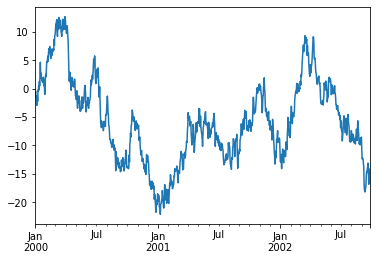

In [1228]:
dfData16 = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
dfData16 = dfData16.cumsum()
dfData16.plot()

<Figure size 432x288 with 0 Axes>

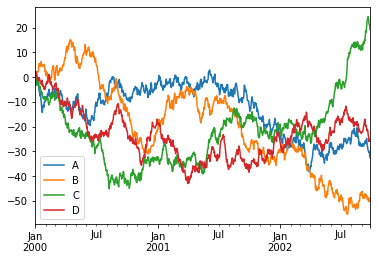

In [1229]:
dfData17 = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

dfData17 = dfData17.cumsum()

plt.figure(); dfData17.plot(); plt.legend(loc='best')

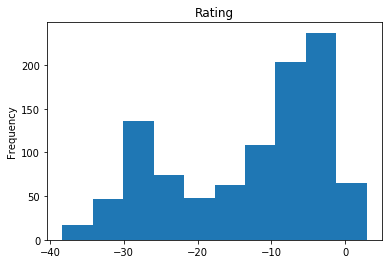

In [1230]:
# Plotting a Histogram

dfData17['A'].plot(kind='hist', title='Rating')

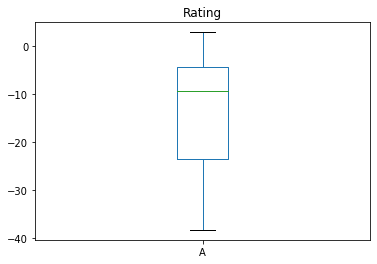

In [1231]:
# Plotting a Box

dfData17['A'].plot(kind='box', title='Rating')

![Flow Data Box.gif](images/Flow Data Box.gif)

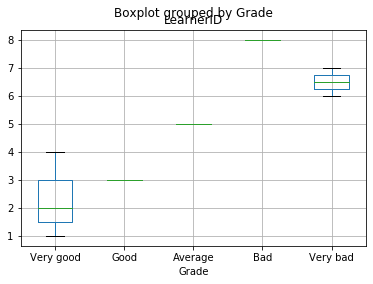

In [1232]:
# Creating new Box plot by combining categorical and continuous data

dfData15.boxplot(column='LearnerID', by='Grade')


### File IO

#### .csv Files

Writing to Reading from HDFStores.

In [1233]:
# Writig to a .csv file

dfData2.to_csv('foo.csv')

In [1234]:
# Reading from a .csv file

pd.read_csv('foo.csv')

,Unnamed: 0,StartValue,StartDate,EndValue,Activity,Action,Response
0,0,1.0,2019-01-02,1.0,3,test,foo
1,1,1.0,2019-01-02,1.0,3,train,foo
2,2,1.0,2019-01-02,1.0,3,test,foo
3,3,1.0,2019-01-02,1.0,3,train,foo


#### HDF5

Writing to Reading from HDFStores.

In [1235]:
# Writing to a HDF5 Store

dfData1.to_hdf('foo.h5','dfData1')

In [1236]:
# Reading from a HDF5 Store

pd.read_hdf('foo.h5','dfData1')

,A,B,C,D
2019-01-01,-0.018862,0.506884,0.002931,-0.134582
2019-01-02,0.160282,1.263459,-0.304879,0.063906
2019-01-03,-0.489581,-0.140495,-1.804682,-0.830140
2019-01-04,0.533439,1.288184,0.830266,0.693305
2019-01-05,0.392912,-0.643530,1.619957,0.316364
2019-01-06,0.297479,-0.755912,2.391173,2.099550


#### Excel

Reading and writing to a MSExcel file.

In [1237]:
# Writing to a MSExcel file

dfData2.to_excel('foo.xlsx', sheet_name='Sheet1')

In [1238]:
# Reading from a MSExcel file

pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,StartValue,StartDate,EndValue,Activity,Action,Response
0,0,1,2019-01-02,1,3,test,foo
1,1,1,2019-01-02,1,3,train,foo
2,2,1,2019-01-02,1,3,test,foo
3,3,1,2019-01-02,1,3,train,foo


## Gotchas

pandas follows the numpy convention of raising an ValueError when trying to convert a value to a Boolean.
This is applicable to the Boolean operations: and, or, or not.

INPUT
`if pd.Series([False, True, False]):
    print("I was true")`

OUTPUT
ValueError: The truth value of a Series is ambiguous. 
Use a.empty, a.bool() a.item(),a.any() or a.all().

## Index of common pandas DataFrame methods

- `.add()` : Method returns addition of dataframe and other, element-wise (binary operator add)
- `.astype()` : Method converts the data types in a Series
- `.axes()` : Method returns a list representing the axes of the DataFrame
- `.between()` : Method extracts rows where a column value falls in between a predefined range
- `.columns()` : Method is an alternative attribute to change the coloumn name
- `.columns()` : Method returns the column labels of the DataFrame
- `.copy()` : Method creates an independent copy of a pandas object
- `.div()` : Method returns floating division of dataframe and other, element-wise (binary operator truediv)
- `.drop()` : Method is used to delete rows or columns from a DataFrame
- `.drop_duplicates()` : Method is an alternative option to identifying duplicate rows and removing them through filtering
- `.dropna()` : Method allows the user to analyze and drop Rows/Columns with Null values in different ways
- `.dtypes()` : Method returns a Series with the data type of each column. The result’s index is the original DataFrame’s columns
- `.duplicated()` : Method creates a Boolean Series and uses it to extract rows that have duplicate values
- `.fillna()` : Method manages and let the user replace NaN values with some value of their own
- `.iloc[]` : Method retrieves rows based on index position
- `.index()` : Method returns index (row labels) of the DataFrame
- `.insert()` : Method inserts a column into a DataFrame
- `.isin()` : Method extracts rows from a DataFrame where a column value exists in a predefined collection
- `.isnull()` : Method creates a Boolean Series for extracting rows with null values
- `.ix[]` : Method retrieves DataFrame rows based on either index label or index position. This method combines the best features of the .loc[] and .iloc[] methods
- `.loc[]` : Method retrieves rows based on index label
- `.mul()` : Method returns multiplication of dataframe and other, element-wise (binary operator mul)
- `.ndim()` : Method returns an ‘int’ representing the number of axes / array dimensions.
- `.nlargest()` : Method pulls out the rows with the largest values in a column
- `.notnull()` : Method creates a Boolean Series for extracting rows with non-null values
- `.nsmallest()` : Method pulls out the rows with the smallest values in a column
- `.nunique()` : Method returns count of the unique values in the dataframe
- `.pop()` : Method is used to delete rows or columns from a DataFrame
- `.query()` : Method is an alternate string-based syntax for extracting a subset from a DataFrame
- `.rank()` : Values in a Series can be ranked in order with this method
- `.rename()` : Method is called on a DataFrame to change the names of the index labels or column names
- `.reset_index()` : Method resets index of a Data Frame. This method sets a list of integer ranging from 0 to length of data as index
- `.sample()` : Method pulls out a random sample of rows or columns from a DataFrame
- `.set_index()` : Method sets the DataFrame index (row labels) using one or more existing columns
- `.shape()` : Method returns a tuple representing the dimensionality of the DataFrame
- `.sort_index()` : Method sorts the values in a DataFrame based on their index positions or labels instead of their values but sometimes a data frame is made out of two or more data frames and hence later index can be changed using this method
- `.sort_values()- Set1, Set2` : Method sorts a data frame in Ascending or Descending order of passed Column
- `.unique()` : Method extracts the unique values in the dataframe
- `.value_counts()` : Method counts the number of times each unique value occurs within the Series
- `.values()` : Method returns a Numpy representation of the DataFrame i.e. only the values in the DataFrame will be returned, the axes labels will be removed
- `.where()` : Method is used to check a Data Frame for one or more condition and return the result accordingly. By default, the rows not satisfying the condition are filled with NaN value


## References

- https://pandas.pydata.org/
- https://pbpython.com/
- https://towardsdatascience.com/a-guide-to-pandas-and-matplotlib-for-data-exploration-56fad95f951c
- https://www.geeksforgeeks.org/python-pandas-dataframe/
- https://towardsdatascience.com/21-pandas-operations-for-absolute-beginners-5653e54f4cda
- https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/
- https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/
- https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
- https://www.tutorialspoint.com/python_pandas/index.htm
- https://jakevdp.github.io/PythonDataScienceHandbook/